In [1]:
# import matplotlib
# matplotlib.use('Agg')

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# pip install imutils
import imutils
from imutils.video import VideoStream
import cv2, time
import numpy as np
import tkinter as tk
from tkinter import messagebox
# from tkinter import ttk
import smtplib

In [2]:
root = tk.Tk() #(screenName='Project_Window')
root.withdraw()

''

In [3]:
pwd

'C:\\Users\\Haider\\PycharmProjects\\Face Mask Detection'

In [4]:
model = load_model('4th_model.h5') #'C:/XPS/MSc Data/Completed Projects/Research Project/Datasets/models/4th_model.h5')

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #'C:/XPS/MSc Data/Completed Projects/Research Project/Datasets/haarcascade_frontalface_default.xml')
# face_cascade = cv2.CascadeClassifier('C:/XPS/MSc Data/Completed Projects/Research Project/Datasets/haarcascade_profileface.xml')
# face_cascade = cv2.CascadeClassifier('C:/XPS/MSc Data/Completed Projects/Research Project/Datasets/haarcascade_frontalface_alt2.xml')

In [6]:
text_dict = {0: 'With Mask', 1: 'Without Mask', 2: 'No Proper Mask'}
rect_color_dict = {0: (0,255,0), 1: (0,0,255), 2: (255,0,0)}

In [7]:
print(rect_color_dict[0])
print(rect_color_dict[1])
print(rect_color_dict[2])

(0, 255, 0)
(0, 0, 255)
(255, 0, 0)


In [8]:
# font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
font = cv2.FONT_HERSHEY_SIMPLEX
# font = cv2.FONT_HERSHEY_DUPLEX

In [9]:
SUBJECT = "Subject"

TEXT1 = "The visitor is not wearing the Face Mask.\nPlease review the video and take necessary action"
TEXT2 = "The visitor is not wearing the Face Mask properly.\nPlease review the video and take necessary action"

In [10]:
vid_source = cv2.VideoCapture(0) # 'test vid.mp4'
# time.sleep(3)

while True:
    ret,frame = vid_source.read()
    frame = cv2.resize(frame, (800, 600))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,
                                          scaleFactor=1.3,
                                          minNeighbors=5,
                                          minSize=(80,80),
                                          flags=cv2.CASCADE_SCALE_IMAGE)

    for x,y,w,h in faces:
        facebox = gray[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (170,10,130), 4)
        facess = face_cascade.detectMultiScale(facebox)
        
        if len(facess) == 0:
            print("No face detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = facebox[ey:ey+eh, ex:ex+ew]
                
                final_image = cv2.resize(face_roi, (224,224))
                final_image = np.reshape(final_image, (1,224,224,1))
                final_image = final_image/255.0
                Predictions = model.predict(final_image)
        
        label = np.argmax(Predictions, axis=1)[0]
        Pred_perc = np.max(Predictions)
        label_perc = "{:.2f}%".format(Pred_perc * 100)
        
        if (label == 1):
            messagebox.showwarning("Warning", "Access Denied: Please wear a Face Mask before entering")

            message = "Subject: {}\n\n{}".format(SUBJECT, TEXT1)
            mail = smtplib.SMTP('smtp.gmail.com', 587)
            mail.ehlo()
            mail.starttls()
            mail.login('facemask.check@gmail.com', 'coventry@12345')
            mail.sendmail('facemask.check@gmail.com', 'facemask.check@gmail.com', message)
            mail.close

        elif (label == 2):
            messagebox.showwarning("Warning", "Access Denied: Please wear the Face Mask properly before entering")

            message = "Subject: {}\n\n{}".format(SUBJECT, TEXT2)
            mail = smtplib.SMTP('smtp.gmail.com', 587)
            mail.ehlo()
            mail.starttls()
            mail.login('facemask.check@gmail.com', 'coventry@12345')
            mail.sendmail('facemask.check@gmail.com', 'facemask.check@gmail.com', message)
            mail.close
        else:
            pass
            break
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), rect_color_dict[label], 2)
        cv2.rectangle(frame, (x,y-40), (x+w,y), rect_color_dict[label], -1)
        cv2.putText(frame, text_dict[label], (x,y-10), font, 0.8, (0,0,0), 2)
        cv2.putText(frame, label_perc, (x+(w+1),y), font, 0.6, (0,0,0), 2)
    
    cv2.imshow("Live Video Feed", frame)
    key = cv2.waitKey(25)

    if (key==27):
        break

cv2.destroyAllWindows()
vid_source.release()

No face detected
No face detected
No face detected


# Prediction of Static Images

In [24]:
def predict_image(image_name, scaleFactor, minNeighbors):
    
    test_image = cv2.imread(image_name)
    gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 
                                          scaleFactor=scaleFactor, 
                                          flags = cv2.CASCADE_SCALE_IMAGE, 
                                          minNeighbors=minNeighbors)
    
    print("Number of Faces found in the Image:", len(faces), '\n')
    
    for (x, y, w, h) in faces:
#         cv2.rectangle(test_image, (x, y), (x+w, y+h), (170,10,130), 1)
        facebox = gray_image[y:y+h, x:x+w]
        resized=cv2.resize(facebox,(224,224))
        reshaped = np.reshape(resized, (1,224,224,1))
        normalized = reshaped/255.0
#         pp=plt.imread(image_name)
#         show=plt.imshow(pp)
        output=model.predict(normalized)
        label = np.argmax(output, axis=1)[0]
        print(output, label)
        
        cv2.rectangle(test_image, (x,y), (x+w, y+h), rect_color_dict[label], 2)
        cv2.rectangle(test_image, (x,y-20), (x+w,y), rect_color_dict[label], -1)
        cv2.putText(test_image, text_dict[label],(x,y-10),font,0.4,(0,0,0), 1)

    return test_image


def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


Number of Faces found in the Image: 5 

[[0.01824581 0.9803406  0.00141365]] 1
[[0.04495141 0.9496287  0.0054199 ]] 1
[[1.5703199e-02 9.8334956e-01 9.4730675e-04]] 1
[[0.04173816 0.9535186  0.00474315]] 1
[[0.2954154  0.6982675  0.00631708]] 1


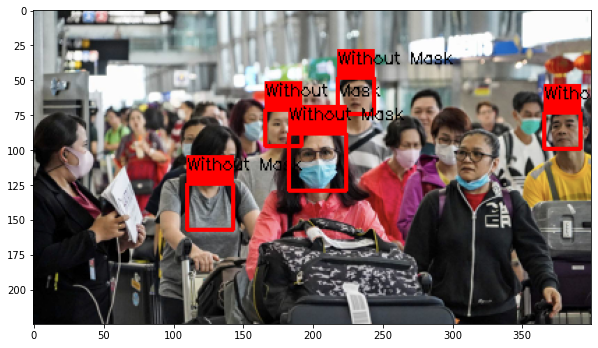

In [25]:
faces = predict_image('maksssksksss388.png' , 1.1, 1)

plt.figure(figsize=(10,8))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 0 



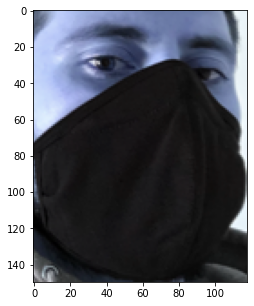

In [26]:
faces = predict_image('test1.png',1.3,5)

plt.figure(figsize=(5,5))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 1 

[[0.69054455 0.23298118 0.07647432]] 0


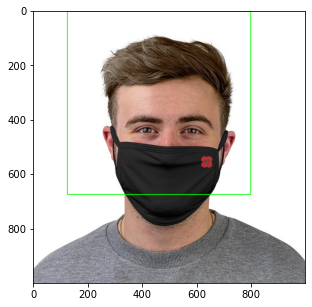

In [27]:
faces = predict_image('test2.jpg',1.1,1)

plt.figure(figsize=(5,5))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 0 



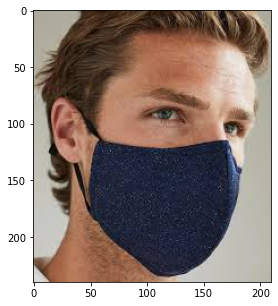

In [28]:
faces = predict_image('test3.jpg',1.1,1)

plt.figure(figsize=(5,5))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 1 

[[0.7803049  0.03236957 0.18732549]] 0


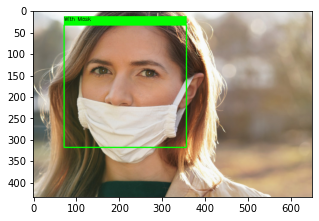

In [29]:
faces = predict_image('test4.jpg',1.1,1)

plt.figure(figsize=(5,5))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 1 

[[8.7387505e-04 9.9907422e-01 5.1898303e-05]] 1


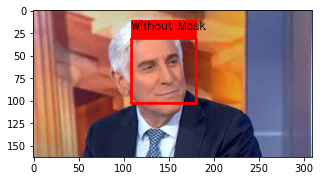

In [30]:
faces = predict_image('test5.jpg',1.1,1)

plt.figure(figsize=(5,5))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 20 

[[0.42570424 0.5139289  0.06036695]] 1
[[0.16414241 0.8111104  0.0247472 ]] 1
[[0.14916871 0.82966614 0.02116528]] 1
[[0.08510148 0.90557855 0.00931996]] 1
[[0.18407795 0.7938102  0.02211189]] 1
[[0.1050906  0.88128424 0.01362515]] 1
[[4.2213094e-03 9.9539244e-01 3.8627072e-04]] 1
[[0.03316299 0.9636816  0.00315543]] 1
[[0.13212338 0.8568867  0.01098991]] 1
[[0.11018641 0.87528837 0.01452519]] 1
[[0.16526344 0.8284745  0.00626198]] 1
[[0.18842871 0.7829933  0.028578  ]] 1
[[0.21534532 0.76026773 0.02438688]] 1
[[0.10022887 0.8891508  0.01062032]] 1
[[0.12940855 0.8492939  0.02129759]] 1
[[0.11353347 0.87065744 0.01580901]] 1
[[0.11757106 0.877037   0.00539189]] 1
[[0.03564491 0.9616075  0.00274768]] 1
[[9.0174852e-03 9.9079704e-01 1.8538754e-04]] 1
[[0.1575465  0.82205707 0.02039643]] 1


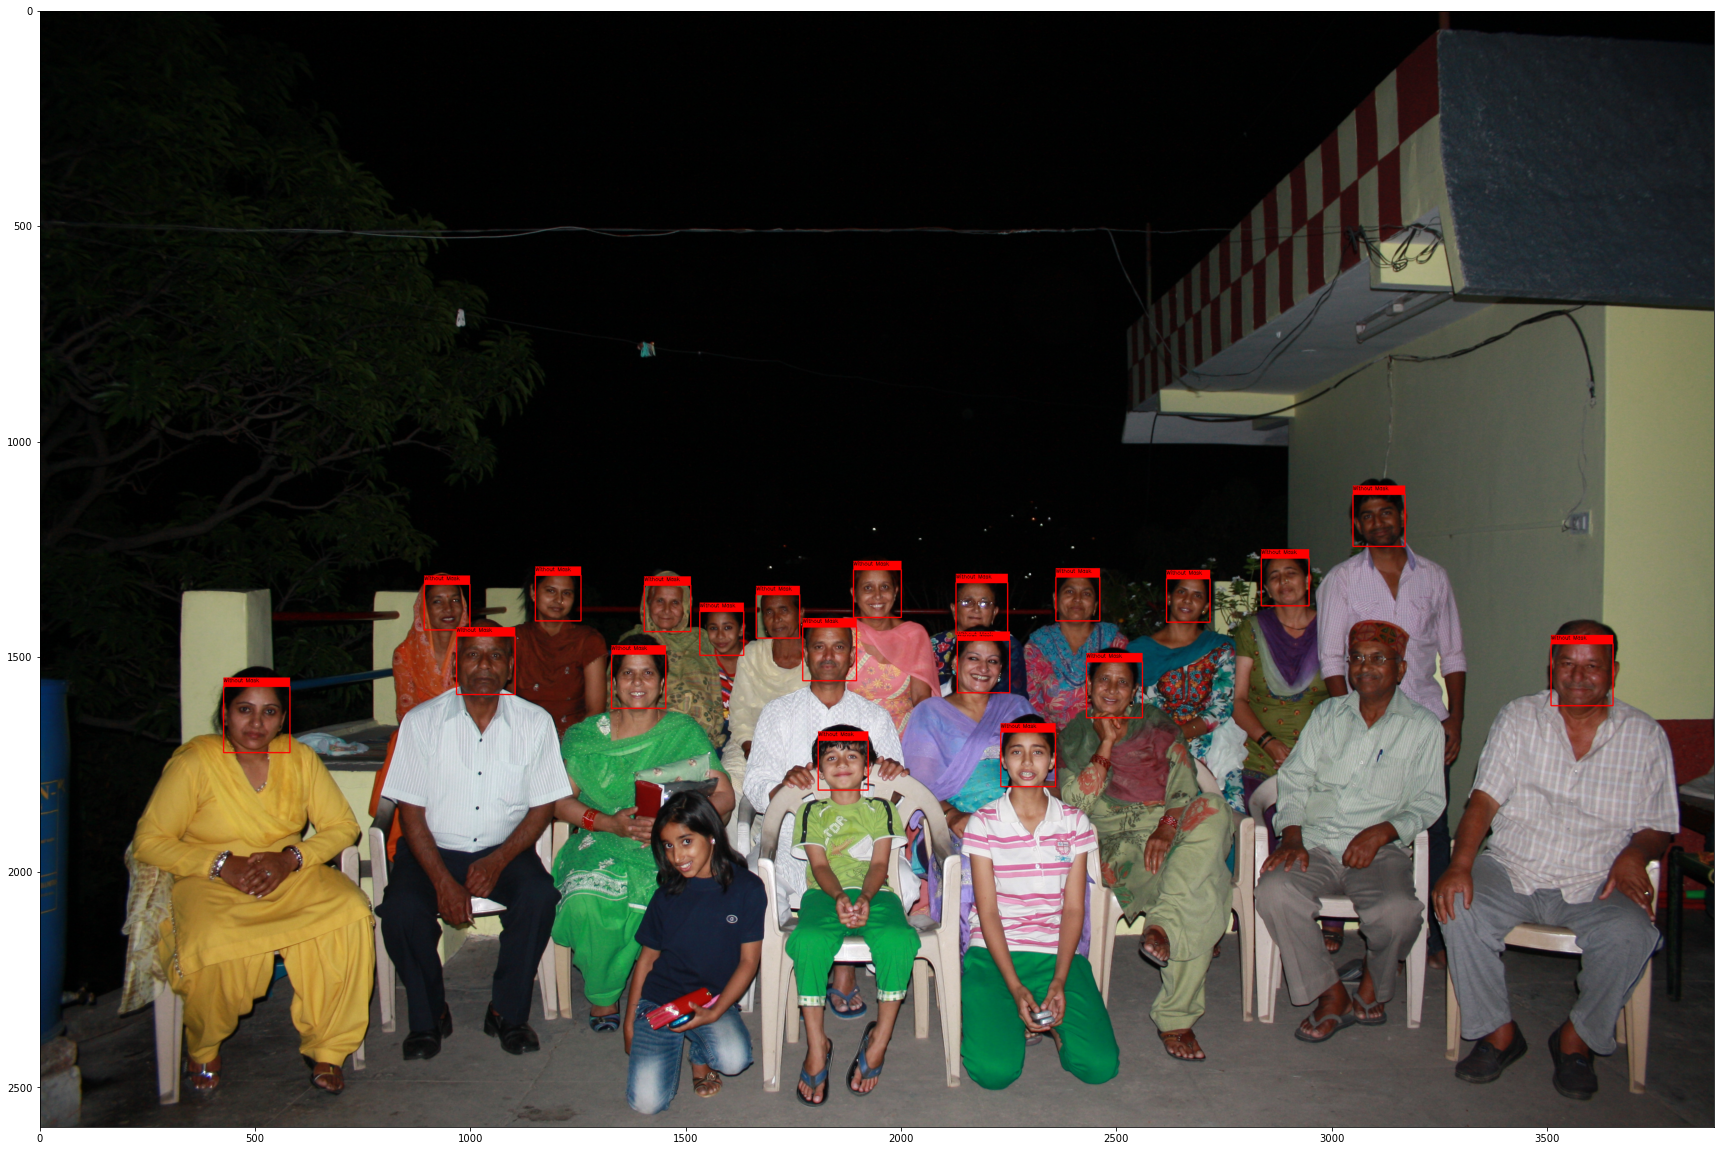

In [31]:
faces = predict_image('family.JPG',1.3,6)

plt.figure(figsize=(30,25))
plt.imshow(convertToRGB(faces))
plt.show()

Number of Faces found in the Image: 2 

[[0.01641997 0.976705   0.00687497]] 1
[[1.3530912e-02 9.8606169e-01 4.0740010e-04]] 1


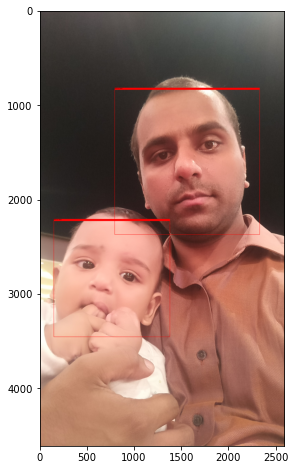

In [32]:
faces = predict_image('IMG_20181010_215445.jpg',1.3,6)

plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces))
plt.show()